# Project: Screen Time Analysis of Indian Kids

In this project, we will perform the Exploratory Data Analysis (EDA) and hypothesis testing to investigate if screen time differs significantly by genders among Indian children.

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from pandas.api.types import is_numeric_dtype

df = pd.read_csv(r"C:\Users\shrey\Documents\Indian_Kids_Screen_Time.csv")
df.head()

,Age,Gender,Avg_Daily_Screen_Time_hr,Primary_Device,Exceeded_Recommended_Limit,Educational_to_Recreational_Ratio,Health_Impacts,Urban_or_Rural
0,14,Male,3.99,Smartphone,True,0.42,"Poor Sleep, Eye Strain",Urban
1,11,Female,4.61,Laptop,True,0.30,Poor Sleep,Urban
2,18,Female,3.73,TV,True,0.32,Poor Sleep,Urban
3,15,Female,1.21,Laptop,False,0.39,NaN,Urban
4,12,Female,5.89,Smartphone,True,0.49,"Poor Sleep, Anxiety",Urban


## Descriptive Statistics

In [48]:
desc_stats = df.describe()
desc_stats

,Age,Avg_Daily_Screen_Time_hr,Educational_to_Recreational_Ratio
count,9712.000000,9712.000000,9712.000000
mean,12.979201,4.352837,0.427226
std,3.162437,1.718232,0.073221
min,8.000000,0.000000,0.300000
25%,10.000000,3.410000,0.370000
50%,13.000000,4.440000,0.430000
75%,16.000000,5.380000,0.480000
max,18.000000,13.890000,0.600000


## Gender Distribution

In [51]:
df['Gender'].value_counts()

Gender
Male      4942
Female    4770
Name: count, dtype: int64

## Distribution of Average Daily Screen Time

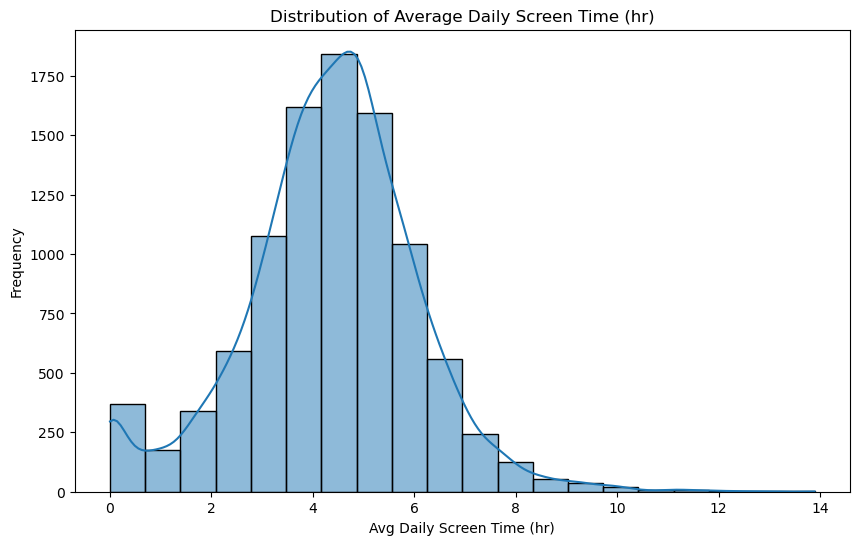

In [54]:
plt.figure(figsize=(10, 6))
sns.histplot(df["Avg_Daily_Screen_Time_hr"], kde=True, bins=20)
plt.title("Distribution of Average Daily Screen Time (hr)")
plt.xlabel("Avg Daily Screen Time (hr)")
plt.ylabel("Frequency")
plt.show()

####  As seen form the histogram.
It shows how many hours kids are spending on screens each day.
Most of the kids spend around 4 to 6 hours daily.
The shape is slightly skewed to the right, meaning a few kids are spending a lot more time on screens than the rest.
This helps us understand what the usual screen time looks like and how spread out the values are.

## Screen Time Distribution by Gender

C:\Users\shrey\AppData\Local\Temp\ipykernel_1616\2929715565.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Gender', y='Avg_Daily_Screen_Time_hr', data=df, palette='pastel')


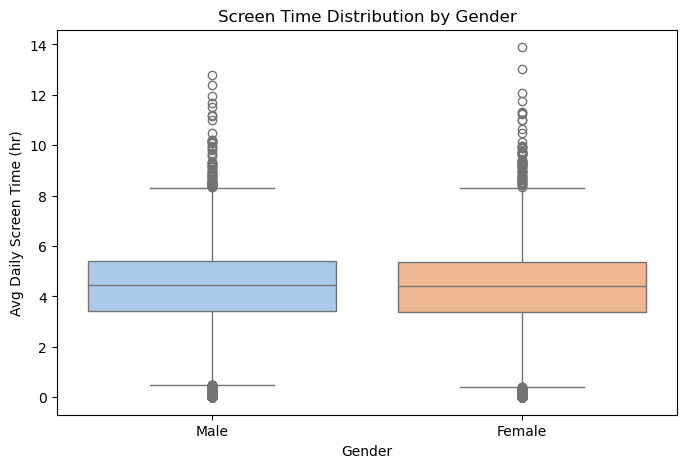

In [57]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Gender', y='Avg_Daily_Screen_Time_hr', data=df, palette='pastel')
plt.title("Screen Time Distribution by Gender")
plt.xlabel("Gender")
plt.ylabel("Avg Daily Screen Time (hr)")
plt.show()

#### Boxplot
It helps us compare screen time between boys and girls.
We can see that the median screen time (the line inside the box) is almost the same for both genders.
The spread of values is also similar, and there are some outliers (dots) which are kids who spend much more or less time than others.

## Hypothesis Testing: Does Screen Time Differ by Gender?

In [62]:
male_screen_time = df[df["Gender"] == "Male"]["Avg_Daily_Screen_Time_hr"]
female_screen_time = df[df["Gender"] == "Female"]["Avg_Daily_Screen_Time_hr"]

t_stat, p_value = stats.ttest_ind(male_screen_time, female_screen_time, equal_var=False)

mean_male = male_screen_time.mean()
mean_female = female_screen_time.mean()

print("Average screen time for boys is:", round(mean_male, 2), "hours per day.")
print("Average screen time for girls is:", round(mean_female, 2), "hours per day.")
print("The t-statistic from the test is:", round(t_stat, 4))
print("The p-value from the test is:", round(p_value, 4))

if p_value < 0.05:
    print("Result: Reject the null hypothesis. Significant difference exists.")
else:
    print("Result: Fail to reject the null hypothesis. No significant difference.")

Average screen time for boys is: 4.38 hours per day.
Average screen time for girls is: 4.33 hours per day.
The t-statistic from the test is: 1.454
The p-value from the test is: 0.146
Result: Fail to reject the null hypothesis. No significant difference.


## Conclusion

Based on the analysis and hypothesis test, there is **no statistically significant difference** in screen time between boys and girls in this dataset (p > 0.05).